# Insurance Claims Charges (ICC)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

Importing Dataset

In [2]:
df = pd.read_csv('insurance.csv')

Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

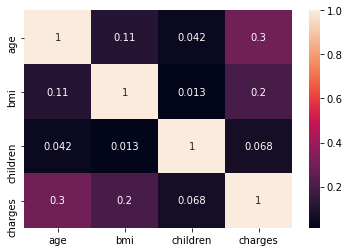

In [6]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Age and Charges')

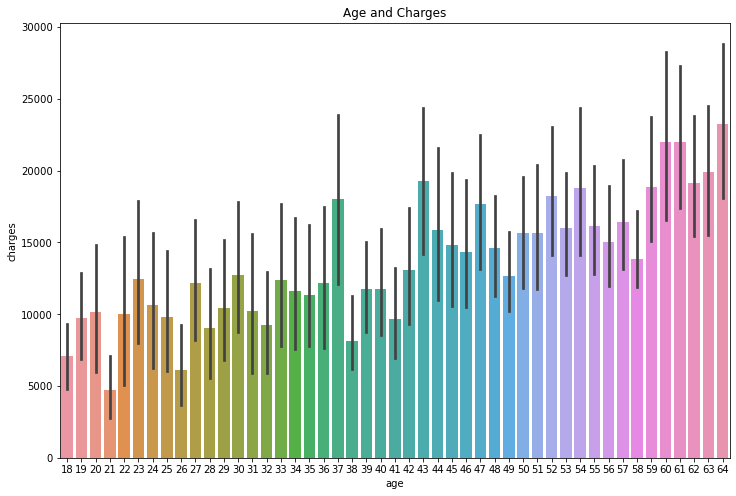

In [7]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)
plt.title('Age and Charges')

Text(0.5, 1.0, 'Sex and Charges')

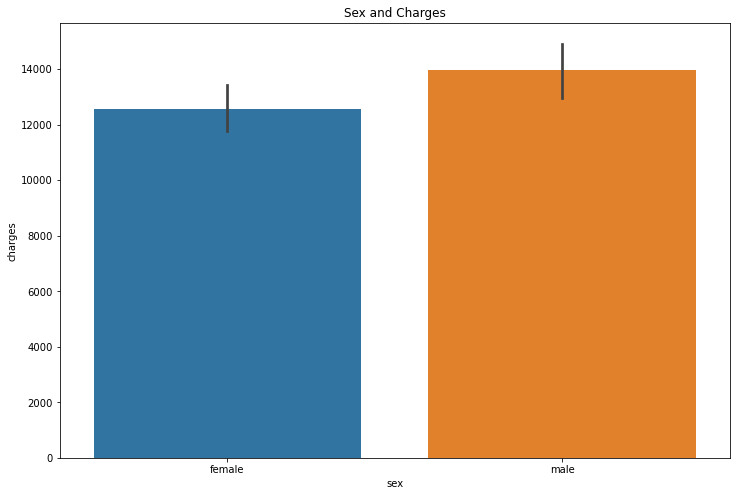

In [8]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('Sex and Charges')

Text(0.5, 1.0, 'Region and Charges')

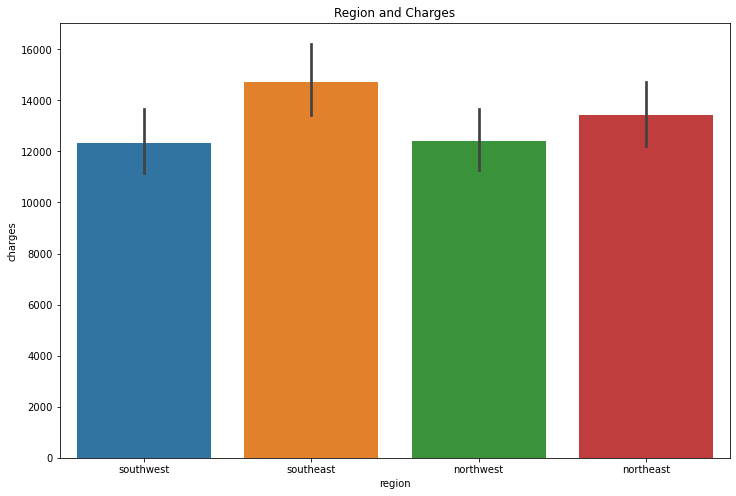

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = df)
plt.title('Region and Charges')

Regression

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['sex'] = LE.fit_transform(df['sex'])

In [11]:
df['smoker'] = LE.fit_transform(df['smoker'])

In [12]:
df['region'] = LE.fit_transform(df['region'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
y = df.charges
x = df.drop('charges', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 176)

In [15]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1003, 6) (335, 6) (1003,) (335,)


In [16]:
from sklearn.linear_model import SGDRegressor as SGD

from xgboost import XGBRegressor as XGB

In [17]:
models = {'LinearRegression' : make_pipeline(StandardScaler(), LinearRegression()),
    'SVRegression' : make_pipeline(StandardScaler(), SVR()),
    'Lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'Ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'ElasticNet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'SGDRegressor' : make_pipeline(StandardScaler(), SGD(random_state=123)),
    'XGBRegressor' : make_pipeline(StandardScaler(), XGB(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))}


In [18]:
models

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'SGDRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor(random_state=123))]),
 'XGBRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                

In [19]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

LinearRegression
SVRegression
Lasso
Ridge
ElasticNet
RandomForest
SGDRegressor
XGBRegressor
GradientBoosting


In [20]:
models_fit

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'SGDRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor(random_state=123))]),
 'XGBRegressor': Pipeline(steps=[('standardscaler', StandardScaler()),
                

In [21]:
res1 = []
res2 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = r2_score(ytest, ypred)
    r2 = mae(ytest, ypred)
    res1 = np.append(res1, r1)
    res2 = np.append(res2, r2)
    output = "%s|Rsquared = %f mae = %f" %(name, r1, r2)
    print(output)

LinearRegression|Rsquared = 0.695233 mae = 4693.740452
SVRegression|Rsquared = -0.081288 mae = 8859.797695
Lasso|Rsquared = 0.695218 mae = 4693.794269
Ridge|Rsquared = 0.695238 mae = 4694.907027
ElasticNet|Rsquared = 0.617229 mae = 5625.121874
RandomForest|Rsquared = 0.797952 mae = 2971.470021
SGDRegressor|Rsquared = 0.695005 mae = 4680.025340
XGBRegressor|Rsquared = 0.763393 mae = 3514.117678
GradientBoosting|Rsquared = 0.810023 mae = 2859.484170


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

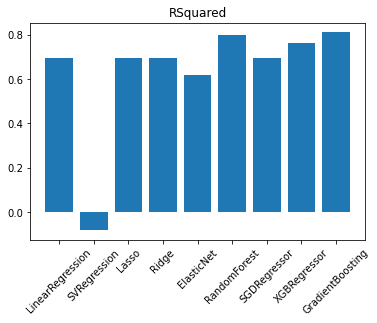

In [22]:
plt.bar(names, res1)
plt.title('RSquared')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

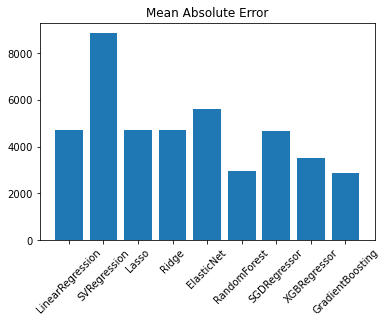

In [23]:
plt.bar(names, res2)
plt.title('Mean Absolute Error')
plt.xticks(rotation = 45)

array([0.69523288, 0.08128849, 0.69521811, 0.69523764, 0.61722858,
       0.79795201, 0.69500545, 0.76339332, 0.8100232 ])

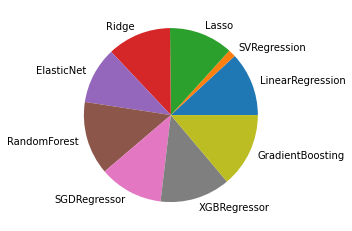

In [24]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [25]:
model = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=100,
                      criterion='friedman_mse', max_depth=3, tol=0.0001))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{r2_score(ytest, ypred)}')
print(f'{mae(ytest, ypred)}')

0.8015250837986756
2112.4792152444206


More Model(s) With Randomized Search

In [26]:
from sklearn.model_selection import RandomizedSearchCV as RS
from sklearn.ensemble import GradientBoostingRegressor as GB

In [27]:
GB_hyperparameters = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1], 
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'max_depth' : [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [28]:
model1 = GB()
model1 = RS(model1, GB_hyperparameters, n_iter=25)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{r2_score(ytest, ypred1)}')
print(f'{mae(ytest, ypred1)}')

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\khade\anaconda3\lib\site

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\khade\anaconda3\lib\site

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.8431114  0.83627278        nan        nan
        nan        nan        nan        nan 0.82527222        nan
        nan        nan        nan        nan 0.82081966        nan
        nan 0.07960801        nan        nan        nan 0.81801909
        nan]
  warnings.warn(


0.7935554377156506
2403.9747304816274


In [29]:
model1.best_params_
print(model1.best_params_)

{'tol': 0.001, 'n_estimators': 800, 'max_depth': 3, 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'mse'}


In [1]:
from sklearn.model_selection import GridSearchCV as GS

model2 = GB()
model2 = GS(model2, GB_hyperparameters)
model2.fit(xtrain, ytrain)
model2.best_params_
ypred2 = model2.predict(xtest)
print(f'{r2_score(ytest, ypred2)}')
print(f'{mae(ytest, ypred2)}')

NameError: name 'GB' is not defined

In [ ]:
model2.best_params_
print(model2.best_params_)

Visualization

In [ ]:
ypred1.shape

In [ ]:
ytest.shape

In [ ]:
from sklearn.linear_model import ElasticNet as EN

In [ ]:
EN_hyperparameters = {
    'alpha' : [0, 0.2, 0.5, 0.7, 1],
    'l1_ratio' : [0, 0.2, 0.5, 0.7, 1], 
    'max_iter' : [100, 200, 500, 700, 1000, 1200, 1300, 1500], 
    'tol' : [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001], 
    'selection' : ['cyclic', 'random']
}

In [ ]:
model2 = EN()
model2 = RS(model2, EN_hyperparameters, n_jobs = -1)
model2.fit(xtrain, ytrain)
model2.best_params_
ypred2 = model2.predict(xtest)
print(f'{r2_score(ytest, ypred2)}')
print(f'{mae(ytest, ypred2)}')

In [ ]:
model2.best_params_
print(model2.best_params_)